# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

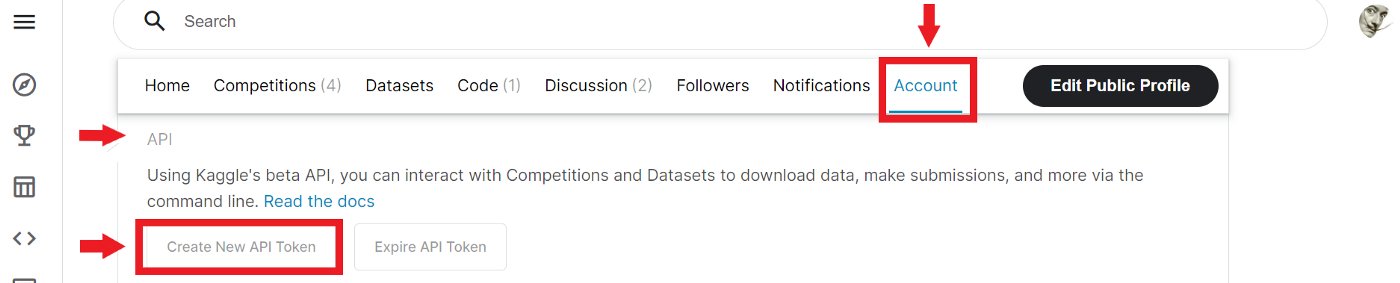

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [1]:
!pip install -q kaggle


Crie a pasta .kaggle

In [2]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

'rm' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'cp' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'chmod' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


Baixe o dataset

In [3]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0




  0%|          | 0.00/187M [00:00<?, ?B/s]
 26%|██▌       | 48.0M/187M [00:00<00:00, 499MB/s]
 51%|█████▏    | 96.0M/187M [00:00<00:00, 408MB/s]
 81%|████████  | 151M/187M [00:00<00:00, 474MB/s] 
100%|██████████| 187M/187M [00:00<00:00, 402MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [2]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

c:\Users\belch\anaconda3\envs\llm311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [3]:
!pip install -U spacy
!python -m spacy download pt_core_news_lg


import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   -------------- ------------------------- 4.5/12.2 MB 22.4 MB/s eta 0:00:01
   ------------------------ --------------- 7.6/12.2 MB 18.8 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.2 MB 18.7 MB/s eta 0:00:01
   ---------------------------------------- 12.2/12.2 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.5
    Uninstalling spacy-3.8.5:
      Successfully uninstalled spacy-3.8.5
     ---------------------------------------- 0.0/568.2 MB ? eta -:--:--
     --------------------------------------- 2.1/568.2 MB 11.7 MB/s eta 0:00:49
     --------------------------------------- 4.2/568.2 MB 10.9 MB/s eta 0:00:52
     --------------------------------------- 6.8/568.2 MB 11.3 MB/s eta 0:00:50
      -------------------------------------- 9.7/568.2 MB 11.8 MB/s eta 0:00:48
      ------------------------------------- 12.6/568.2 MB 12.1 MB/s eta 0:0

ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [4]:
import nltk
nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\belch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\belch\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\belch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\belch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [5]:
!pip install pyldavis &> /dev/null
!pip install seaborn

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

A sintaxe do comando est� incorreta.


In [6]:
df.head()

title  \
0  Lula diz que está 'lascado', mas que ainda tem...   
1  'Decidi ser escrava das mulheres que sofrem', ...   
2  Três reportagens da Folha ganham Prêmio Petrob...   
3  Filme 'Star Wars: Os Últimos Jedi' ganha trail...   
4  CBSS inicia acordos com fintechs e quer 30% do...   

                                                text        date   category  \
0  Com a possibilidade de uma condenação impedir ...  2017-09-10      poder   
1  Para Oumou Sangaré, cantora e ativista malines...  2017-09-10  ilustrada   
2  Três reportagens da Folha foram vencedoras do ...  2017-09-10      poder   
3  A Disney divulgou na noite desta segunda-feira...  2017-09-10  ilustrada   
4  O CBSS, banco da holding Elopar dos sócios Bra...  2017-09-10    mercado   

  subcategory                                               link  
0         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
1         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...  
2         NaN  http://www1.folha.uol.com.br/poder/2017/10/192...  
3         NaN  http://www1.folha.uol.com.br/ilustrada/2017/10...  
4         NaN  http://www1.folha.uol.com.br/mercado/2017/10/1...

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [ ]:
df['date'] = pd.to_datetime(df.date)
news_2016 = df[(df["date"].dt.year == 2016) & (df["category"].str.lower() == "mercado")]

In [53]:
news_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7943 entries, 34207 to 94314
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        7943 non-null   object        
 1   text         7943 non-null   object        
 2   date         7943 non-null   datetime64[ns]
 3   category     7943 non-null   object        
 4   subcategory  0 non-null      object        
 5   link         7943 non-null   object        
 6   nltk_tokens  7943 non-null   object        
 7   spacy_doc    7943 non-null   object        
 8   spacy_lemma  7943 non-null   object        
 9   spacy_ner    7943 non-null   object        
 10  tfidf        7943 non-null   object        
 11  topic        7943 non-null   int64         
 12  vectors      7943 non-null   object        
 13  cluster      7943 non-null   int64         
 14  tsne_x       7943 non-null   float32       
 15  tsne_y       7943 non-null   float32       
dtypes: dat

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [9]:
from nltk.tokenize import word_tokenize
import re
from nltk.stem import RSLPStemmer
stemmer = RSLPStemmer()
def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  tokens = word_tokenize(text)
  stems = [stemmer.stem(token.lower()) for token in tokens if token.isalpha()]
  stems = [token for token in stems if len(token) > 2]
  return stems

news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

100%|██████████| 7943/7943 [01:55<00:00, 68.81it/s]


In [10]:

pd.set_option("display.max_rows", None)  
pd.set_option("display.max_columns", None)  
pd.set_option("display.max_colwidth", None)  

news_2016[["nltk_tokens", "text"]].head(1)

nltk_tokens  \
34207  [sou, apen, mulh, fazend, diz, christin, cond, com, modst, mas, par, mil, mor, uma, comunidad, rural, lancash, noro, inglaterr, ela, uma, pioneir, internet, cond, deu, uma, solu, cas, par, problem, falt, band, larg, vilarej, solu, evolu, pont, inici, transform, uma, prov, internet, brn, band, larg, par, nort, rural, singl, ingl, tradu, livr, prov, oferec, veloc, gigabit, gbp, par, comunidad, lun, valley, com, iss, veloc, band, larg, local, vez, mai, que, mdi, grbretanh, que, cerc, mbp, segund, dad, ofcom, rgo, fiscaliz, comunica, rein, unid, tud, come, que, separ, fazend, cond, uma, anten, wif, poc, nic, conex, com, web, fornec, pel, univers, ...]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [ ]:
import spacy

nlp = spacy.load("pt_core_news_lg")

news_2016["spacy_doc"] = list(nlp.pipe(news_2016.text.str.lower(), batch_size=50))

In [13]:
news_2016["spacy_doc"].head(1)

34207    (", sou, apenas, a, mulher, de, um, fazendeiro, ", ,, diz, christine, conder, ,, com, modéstia, ., mas, para, 2,3, mil, moradores, de, uma, comunidade, rural, de, lancashire, ,, no, noroeste, da, inglaterra, ,, ela, é, uma, pioneira, da, internet, .,  , em, 2009, ,, conder, deu, uma, solução, caseira, para, o, problema, de, falta, de, banda, larga, o, vilarejo, ., e, a, solução, evoluiu, a, ponto, de, a, iniciativa, se, transformar, em, uma, provedora, de, internet, ,, a, b4rn, (, banda, larga, para, o, norte, rural, ,, da, singla, em, inglês, ,, em, tradução, livre, ), .,  , o, ...)
Name: spacy_doc, dtype: object

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [14]:
print(nltk.corpus.stopwords.words("portuguese"))

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [15]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    EXTRA_STOP_WORDS = ["o", "em", "em o", "em a" ,"ano", "de", "de o", "de a","por o","em este","de este","de esse","outro","algum","em esse","de ela","de ele"]
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS) + list(EXTRA_STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return w.is_alpha and w.lemma_ not in complete_stopwords and not w.is_punct and len(w)> 2

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    return [token.lemma_ for token in doc if filter(token)]

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

100%|██████████| 7943/7943 [00:03<00:00, 2533.52it/s]


In [16]:
news_2016[["spacy_lemma", "text"]].head(1)

spacy_lemma  \
34207  [mulher, fazendeiro, Christine, Conder, modéstia, morador, comunidade, rural, Lancashire, noroeste, inglaterra, pioneira, Internet, conder, solução, caseiro, problema, banda, larga, vilarejo, solução, evoluir, iniciativa, transformar, provedora, Internet, banda, larga, norte, rural, singla, inglês, tradução, livre, provedor, oferecer, velocidade, gigabite, Gbps, comunidade, lune, valley, velocidade, banda, largo, média, cerca, mbps, dado, ofcom, órgão, fiscalizador, comunicação, reino, unir, começar, árvore, separar, fazenda, conder, antena, época, único, conexão, web, fornecir, universidade, lancaster, ficar, alta, conexão, prejudicar, provedor, região, conder, decidir, resolver, problema, sozinha, comprar, quilômetro, cabo, fibra, ótico, abrir, vala, trator, conectar, fazenda, Internet, cavamos, ligar, cabo, sozinho, provar, pessoa, comuns, complicado, dia, trabalho, ...]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [17]:
pd.set_option("display.max_seq_items", 10000) 

news_2016[["spacy_lemma","nltk_tokens", "text"]].head(1)


spacy_lemma  \
34207  [mulher, fazendeiro, Christine, Conder, modéstia, morador, comunidade, rural, Lancashire, noroeste, inglaterra, pioneira, Internet, conder, solução, caseiro, problema, banda, larga, vilarejo, solução, evoluir, iniciativa, transformar, provedora, Internet, banda, larga, norte, rural, singla, inglês, tradução, livre, provedor, oferecer, velocidade, gigabite, Gbps, comunidade, lune, valley, velocidade, banda, largo, média, cerca, mbps, dado, ofcom, órgão, fiscalizador, comunicação, reino, unir, começar, árvore, separar, fazenda, conder, antena, época, único, conexão, web, fornecir, universidade, lancaster, ficar, alta, conexão, prejudicar, provedor, região, conder, decidir, resolver, problema, sozinha, comprar, quilômetro, cabo, fibra, ótico, abrir, vala, trator, conectar, fazenda, Internet, cavamos, ligar, cabo, sozinho, provar, pessoa, comuns, complicado, dia, trabalho, pesar, explicar, lema, lema, Christine, Conder, resumir, letra, jfdi, de elas, referir, inicial, palavra, formar, frase, just, tradução, livre, letra, referir, palavrão, inglês, seguir, lema, afirmar, instalar, quilômetro, cabo, fibra, ótico, conectar, várias, comunidade, rede, conexão, residência, individualmente, comunidade, inteiro, precisar, assinar, serviço, instalação, cabo, infraestrutura, casa, pagar, libra, cerca, taxa, conexão, libra, empresa, pagar, morador, residência, precisar, instalação, sozinho, serviço, ficar, popular, empresa, trabalho, pessoa, serra, leoa, áfrica, assistir, a o, dia, palestra, comunidade, interessar, imitar, modelo, trabalho, manter, rede, voluntário, funcionário, pagar, fazendeiro, região, abrir, acesso, propriedade, morador, equipamento, trator, escavadeira, trabalho, pesar, precisar, devolver, lucro, a o, acionista, condição, empresa, benefício, conseguir, aplicar, comunidade, condecoração, serviço, Christine, Conder, reconhecir, rainha, elizabeth, receber, título, mbe, membro, ordem, império, britânico, junto, Barry, Forde, professor, universitário, liderar, iniciativa, condecorar, expandir, rede, banda, largo, zona, rural, chegada, iniciativa, atual, cliente, conexão, telefônico, internet, pagar, preço, alto, rede, satélite, morador, região, conexão, web, vital, fazendeiro, precisar, registrar, bezerro, nascer, página, departamento, ambiente, alimentação, negócio, rural, britânico, defra, sigla, inglês, dia, vida, animal, agricultor, banda, larga, depender, espaço, público, oferta, dever, pagar, alguém, registro, explicar, conder, agricultor, apoiar, projeto, acesso, terra, atravessar, conexão, chegar, vilarejo, subsid, conexão, fazendeiro, fazendeiro, conseguir, chegar, vilarejo, fazendeiro, contar, existir, empresa, fornecer, banda, largo, zona, rural, garantir, chegar, velocidade, Gbps, conder, garantir, banda, larga, apoiar, provedor, alternativo, cobrir, país, empresa, britânico, virgin, liderar, setor, país, negócio, existir, conseguir, lucro, negócio, dever, garantir, país, conectado, apoiar, rede, alternativo]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [18]:
def NER(doc: spacy.tokens.Doc):
  """
  Return the list of organizations for a SPACY document
  """
  return [ent.text for ent in doc.ents if ent.label_ == "ORG"]
news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

100%|██████████| 7943/7943 [00:00<00:00, 27058.14it/s]


In [19]:
filtered_df = news_2016[news_2016["spacy_ner"].notna() & news_2016["spacy_ner"]]

filtered_df.spacy_ner.head()

34207                  [lune valley, bt, virgin]
34238                        [stf, oi, tim, stf]
34245                                 [tv minas]
34248                               [mit, apple]
34249    [r$, r$ 69, amazon, benbella books, r$]
Name: spacy_ner, dtype: object

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None


  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      tfidf = TfidfVectorizer(
        min_df=10,
        max_features=5000
      )
      tfidf.fit([' '.join(tokens) for tokens in self.doc_tokens])
      self.tfidf = tfidf  
      return tfidf

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array =  vectorizer().transform([tokens]).toarray()[0]
    return array


news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)

100%|██████████| 7943/7943 [00:06<00:00, 1309.51it/s]


In [21]:
dtm = pd.DataFrame(news_2016['tfidf'].to_list(),
                   columns=vectorizer.tfidf.get_feature_names_out())

In [22]:
dtm.head()

2e    abaixo  abalar  abandonar  abastecer  abastecimento  abater  \
0  0.0  0.000000     0.0        0.0        0.0            0.0     0.0   
1  0.0  0.000000     0.0        0.0        0.0            0.0     0.0   
2  0.0  0.000000     0.0        0.0        0.0            0.0     0.0   
3  0.0  0.000000     0.0        0.0        0.0            0.0     0.0   
4  0.0  0.040931     0.0        0.0        0.0            0.0     0.0   

   abatimento  abatir  abc  abe  abear  abecip  abertamente  aberto  abertura  \
0         0.0     0.0  0.0  0.0    0.0     0.0          0.0     0.0       0.0   
1         0.0     0.0  0.0  0.0    0.0     0.0          0.0     0.0       0.0   
2         0.0     0.0  0.0  0.0    0.0     0.0          0.0     0.0       0.0   
3         0.0     0.0  0.0  0.0    0.0     0.0          0.0     0.0       0.0   
4         0.0     0.0  0.0  0.0    0.0     0.0          0.0     0.0       0.0   

   abf  abono  abordagem  abordar  abrangente  abranger     abreu  abrigar  \
0  0.0    0.0        0.0      0.0         0.0       0.0  0.000000      0.0   
1  0.0    0.0        0.0      0.0         0.0       0.0  0.000000      0.0   
2  0.0    0.0        0.0      0.0         0.0       0.0  0.000000      0.0   
3  0.0    0.0        0.0      0.0         0.0       0.0  0.000000      0.0   
4  0.0    0.0        0.0      0.0         0.0       0.0  0.076024      0.0   

   abril     abrir  absolutamente  absoluto  absorver  absurdo  abuso  abutr  \
0    0.0  0.046506            0.0       0.0       0.0      0.0    0.0    0.0   
1    0.0  0.000000            0.0       0.0       0.0      0.0    0.0    0.0   
2    0.0  0.000000            0.0       0.0       0.0      0.0    0.0    0.0   
3    0.0  0.000000            0.0       0.0       0.0      0.0    0.0    0.0   
4    0.0  0.000000            0.0       0.0       0.0      0.0    0.0    0.0   

   acabar  academia  acadêmico  acalmar  acarretar  acatar  aceitar  aceitas  \
0     0.0       0.0        0.0      0.0        0.0     0.0      0.0      0.0   
1     0.0       0.0        0.0      0.0        0.0     0.0      0.0      0.0   
2     0.0       0.0        0.0      0.0        0.0     0.0      0.0      0.0   
3     0.0       0.0        0.0      0.0        0.0     0.0      0.0      0.0   
4     0.0       0.0        0.0      0.0        0.0     0.0      0.0      0.0   

   aceitação  aceitável  acelerar  aceleração  acentuado  acentuar  acertar  \
0        0.0        0.0       0.0         0.0        0.0       0.0      0.0   
1        0.0        0.0       0.0         0.0        0.0       0.0      0.0   
2        0.0        0.0       0.0         0.0        0.0       0.0      0.0   
3        0.0        0.0       0.0         0.0        0.0       0.0      0.0   
4        0.0        0.0       0.0         0.0        0.0       0.0      0.0   

   acerto  acessar   acesso  acessível  acessório     achar  acidente  acima  \
0     0.0      0.0  0.05893        0.0        0.0  0.000000       0.0    0.0   
1     0.0      0.0  0.00000        0.0        0.0  0.000000       0.0    0.0   
2     0.0      0.0  0.00000        0.0        0.0  0.000000       0.0    0.0   
3     0.0      0.0  0.00000        0.0        0.0  0.039986       0.0    0.0   
4     0.0      0.0  0.04882        0.0        0.0  0.000000       0.0    0.0   

   acionar  acionista  acionário  acomodar  acomodação  acompanhamento  \
0      0.0   0.030488        0.0       0.0         0.0             0.0   
1      0.0   0.000000        0.0       0.0         0.0             0.0   
2      0.0   0.000000        0.0       0.0         0.0             0.0   
3      0.0   0.000000        0.0       0.0         0.0             0.0   
4      0.0   0.000000        0.0       0.0         0.0             0.0   

   acompanhar  aconselhar  acontecer  acontecimento  acordar    acordo  \
0         0.0    0.000000   0.000000            0.0      0.0  0.000000   
1         0.0    0.000000   0.000000            0.0      0.0  0.043280   
2         0.0    0.00000

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [24]:
N_TOPICS = 9

corpus = np.array(news_2016.tfidf.tolist())
#Escreva seu código aqui
lda = LDA(n_components=N_TOPICS, 
          max_iter=100,
          random_state=SEED)

lda.fit(dtm.values)

LatentDirichletAllocation(max_iter=100, n_components=9, random_state=123)

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [25]:
def get_topic(tfidf: np.array):
    """
    Get best  topic for a lda trained model
    """
    topics_distribution = lda.transform([tfidf])[0]  # Get topic probabilities
    return np.argmax(topics_distribution)

    

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)

100%|██████████| 7943/7943 [00:05<00:00, 1415.78it/s]


## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

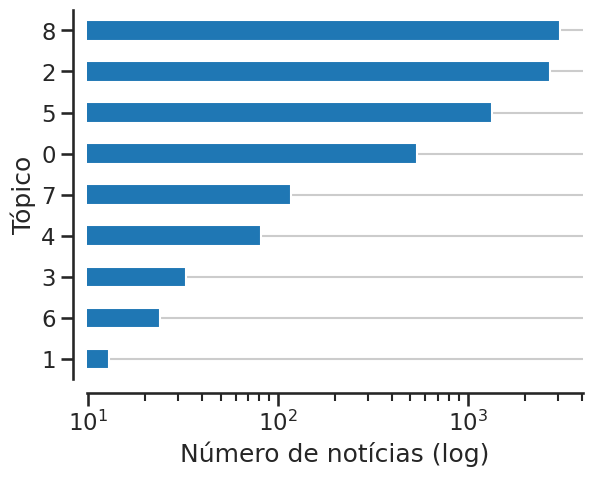

In [26]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

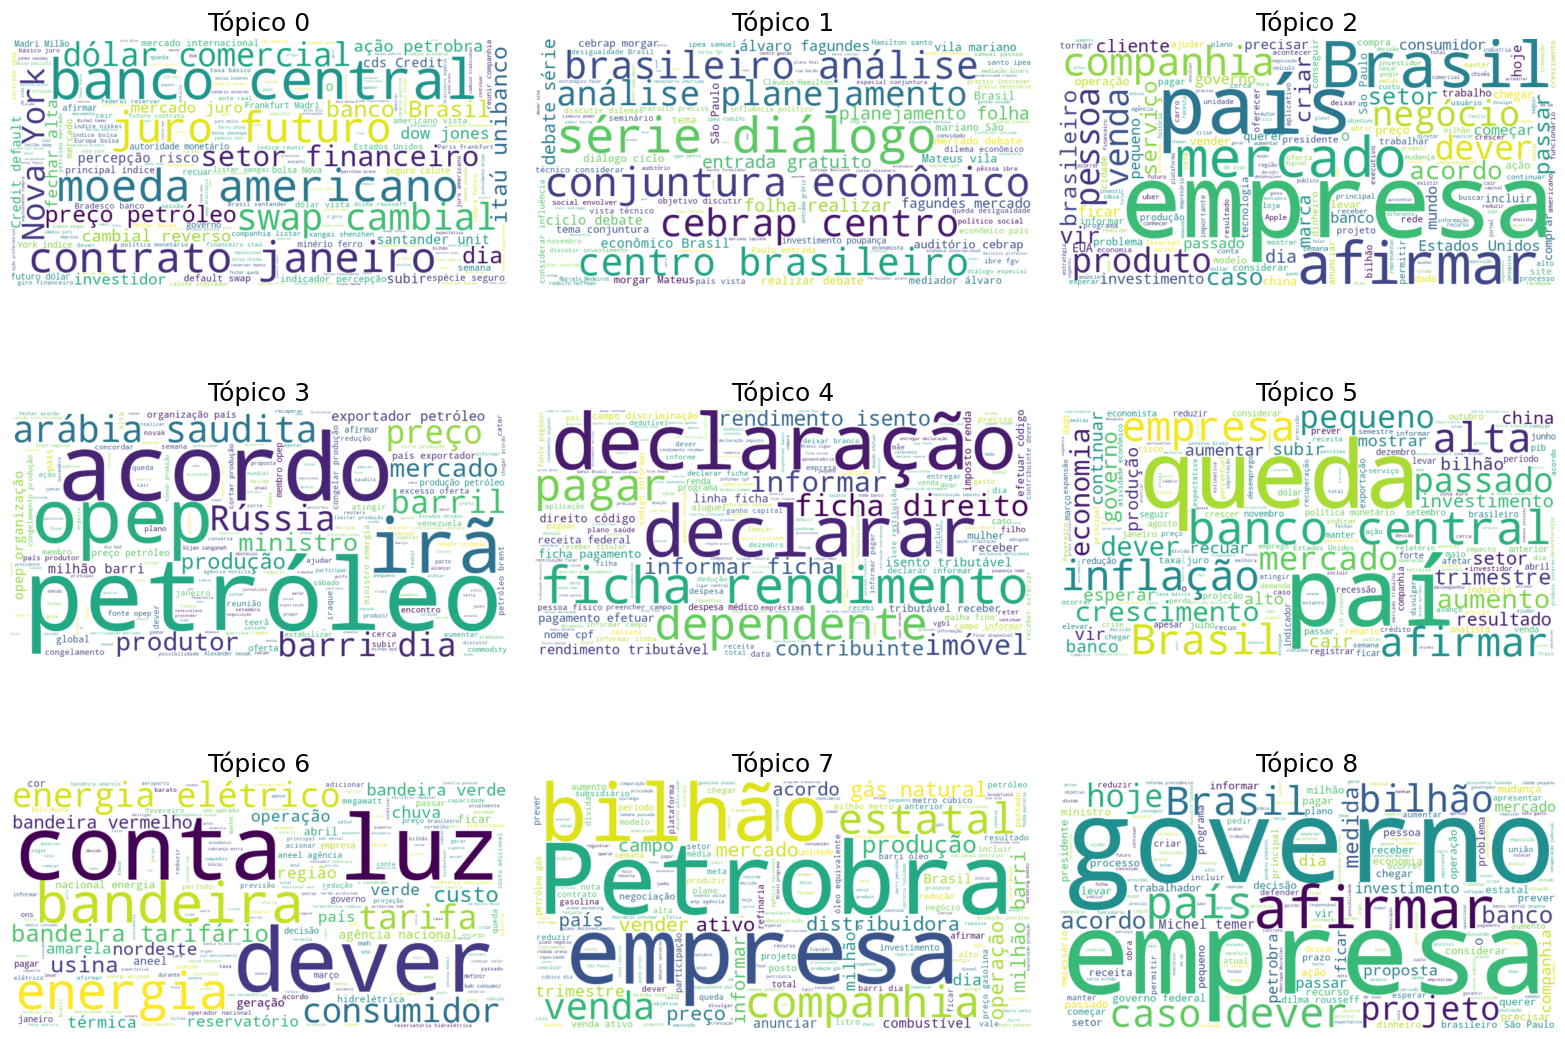

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    """
    Plot a WordCloud for the given text on the provided matplotlib axis.

    Arguments:
        - text: string to be analyzed
        - ax: matplotlib subplot axis
    
    Returns:
        - ax: updated axis with the WordCloud plot
    """
    # Criar a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plotar a WordCloud na figura fornecida
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")  # Remover eixos para melhor visualização

    return ax


def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx}")
fig.tight_layout()

In [39]:
topic_news = news_2016[news_2016['topic'] == 5]
list_of_words = list(chain(*topic_news.spacy_lemma.values.tolist()))

words_topic_5= ' '.join(list_of_words)
from collections import Counter

Counter(words_topic_5.split()).most_common(20)

[('queda', 2401),
 ('bilhão', 1936),
 ('banco', 1901),
 ('trimestre', 1788),
 ('mercado', 1737),
 ('economia', 1643),
 ('taxa', 1641),
 ('juro', 1573),
 ('preço', 1554),
 ('inflação', 1513),
 ('país', 1470),
 ('passado', 1450),
 ('crescimento', 1344),
 ('econômico', 1164),
 ('alta', 1100),
 ('central', 1048),
 ('setor', 1043),
 ('resultado', 1029),
 ('período', 1020),
 ('aumento', 970)]

In [40]:
topic_news = news_2016[news_2016['topic'] == 8]
list_of_words = list(chain(*topic_news.spacy_lemma.values.tolist()))

words_topic_5= ' '.join(list_of_words)
from collections import Counter

Counter(words_topic_5.split()).most_common(20)

[('governo', 8290),
 ('bilhão', 4807),
 ('empresa', 4511),
 ('presidente', 3654),
 ('afirmar', 3580),
 ('público', 3078),
 ('dever', 2828),
 ('país', 2783),
 ('banco', 2783),
 ('medida', 2677),
 ('proposta', 2632),
 ('federal', 2526),
 ('ministro', 2340),
 ('dívida', 2331),
 ('temer', 2288),
 ('projeto', 2254),
 ('Brasil', 2045),
 ('acordo', 2025),
 ('investimento', 2008),
 ('gasto', 1933)]

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

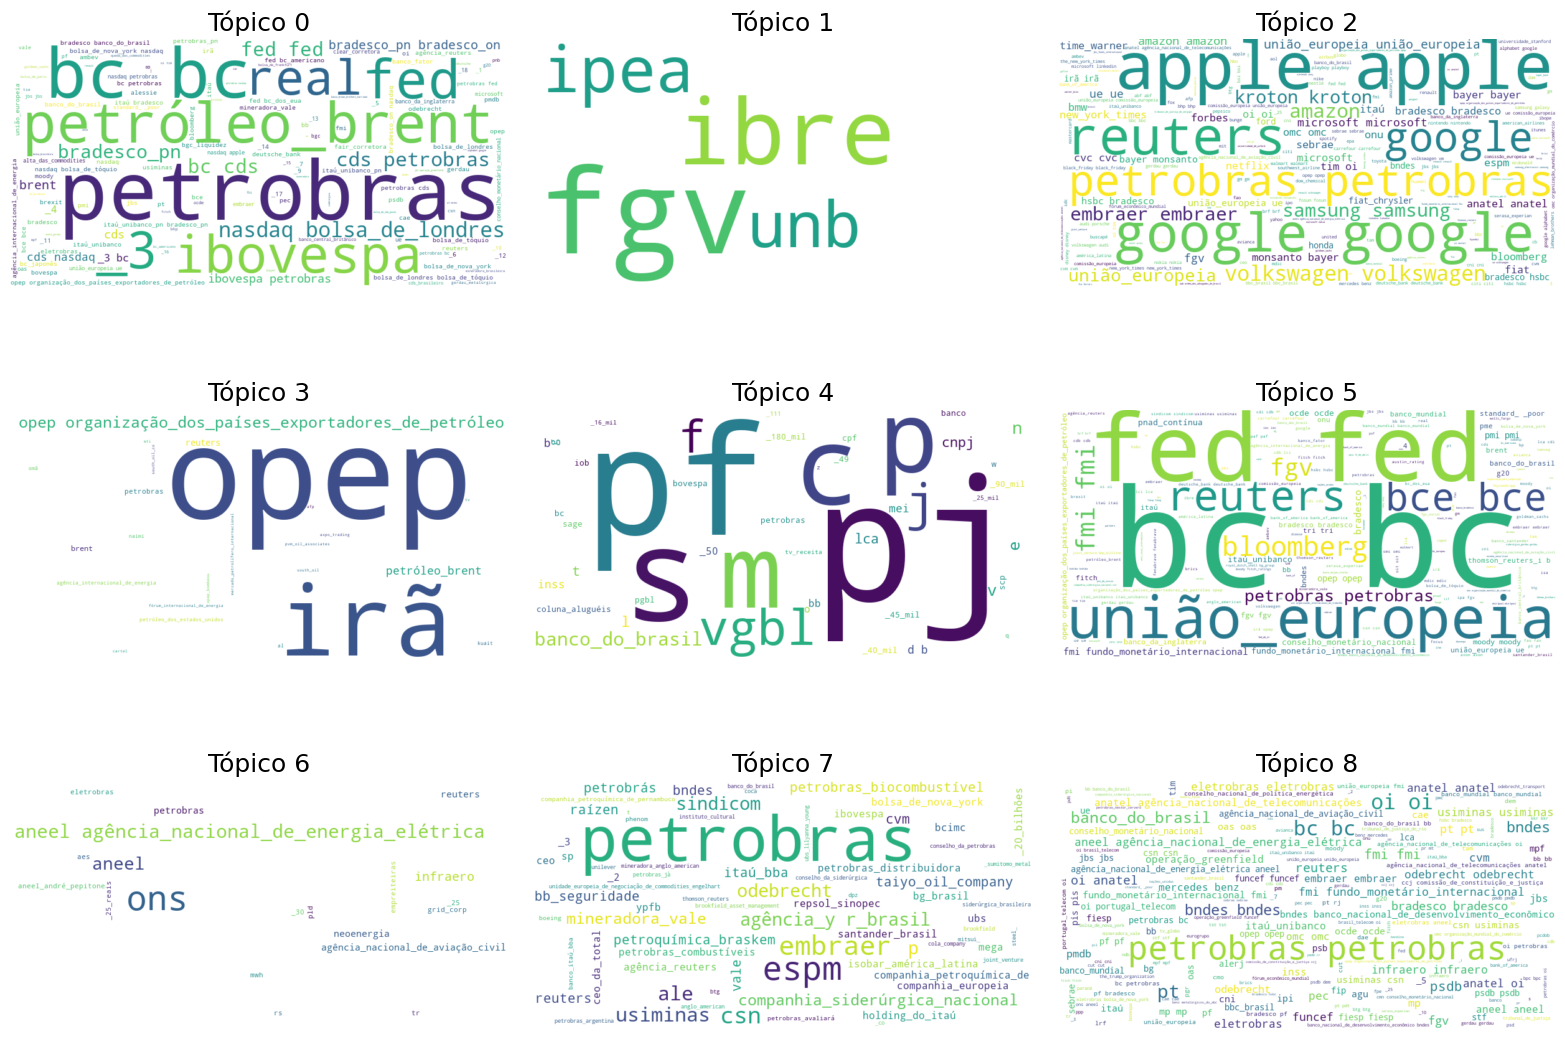

In [28]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx }")
fig.tight_layout()

### Aplicando embedding apenas para fins comparativos

In [42]:
news_2016.spacy_lemma

news_2016['vectors'] = news_2016.spacy_doc.progress_apply(lambda doc: np.array(doc.vector))



100%|██████████| 7943/7943 [00:18<00:00, 426.25it/s]


In [ ]:
from sklearn.cluster import AgglomerativeClustering
vectors = np.stack(news_2016.vectors.values)
cluster_model = AgglomerativeClustering(n_clusters=N_TOPICS)
news_2016['cluster'] = cluster_model.fit_predict(vectors)

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, random_state=SEED, init='pca')
tsne_result = tsne.fit_transform(vectors)



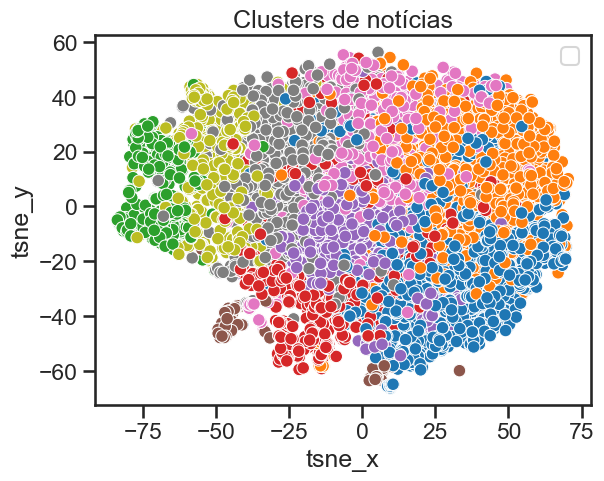

In [54]:
news_2016["tsne_x"], news_2016["tsne_y"] = tsne_result[:, 0], tsne_result[:, 1]

sns.set_style("ticks")

sns.scatterplot(
    x="tsne_x",
    y="tsne_y",
    hue="cluster",
    palette='tab10',
    data=news_2016)

plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.title('Clusters de notícias')
plt.legend("")


In [175]:
news_2016.columns

Index(['title', 'text', 'date', 'category', 'subcategory', 'link', 'spacy_doc', 'nltk_tokens', 'spacy_lemma', 'spacy_ner', 'tfidf', 'topic', 'vectors', 'cluster', 'tsne_x', 'tsne_y'], dtype='object')

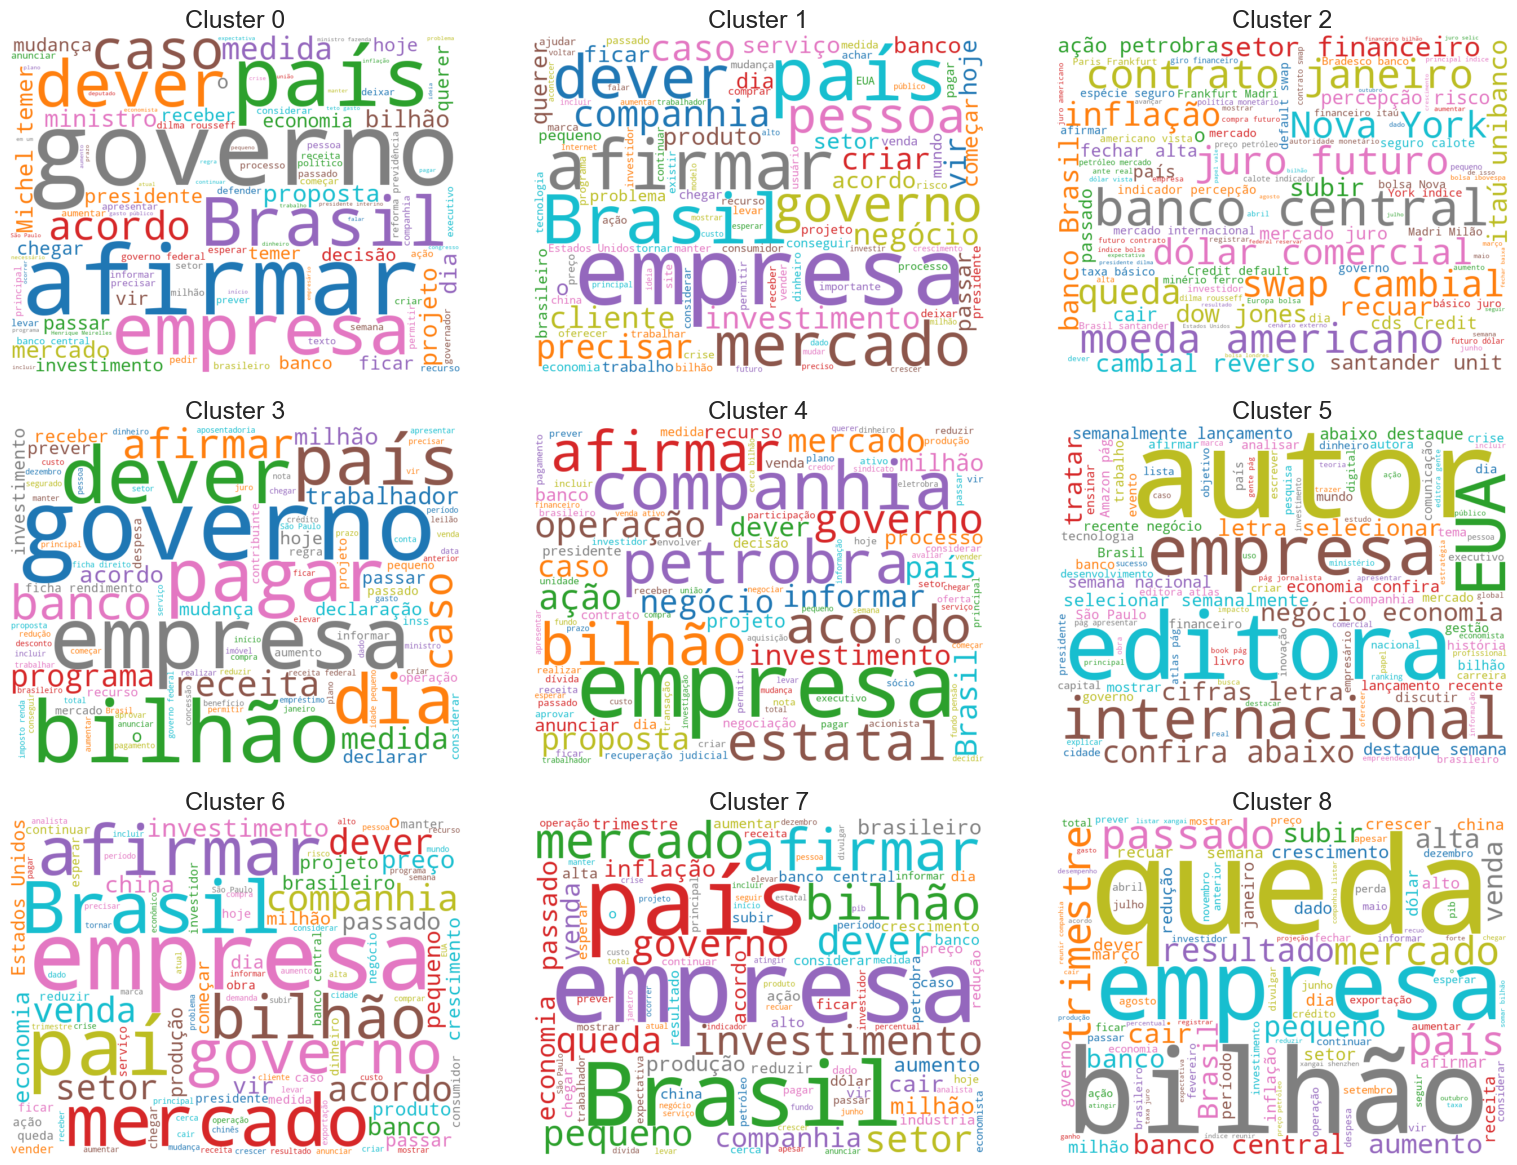

In [55]:
from wordcloud import WordCloud

fig, axes = plt.subplots(3, 3, figsize=(16,12))


for cluster_id in sorted(news_2016.cluster.unique()):
    texts = []
    cluster_df = news_2016[news_2016.cluster == cluster_id]
    for text in cluster_df.spacy_lemma.tolist():
        texts.extend(text)
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=600,
                          background_color="white",
                          colormap="tab10", max_words=100).generate(text)
    ax = axes.flatten()[cluster_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Cluster {cluster_id}")
    ax.axis("off")
fig.tight_layout()

In [58]:
from sklearn.cluster import KMeans
vectors = np.stack(news_2016.vectors.values)
kmeans_model = KMeans(n_clusters=N_TOPICS, random_state=SEED)
news_2016['cluster_kmeans'] = kmeans_model.fit_predict(vectors)



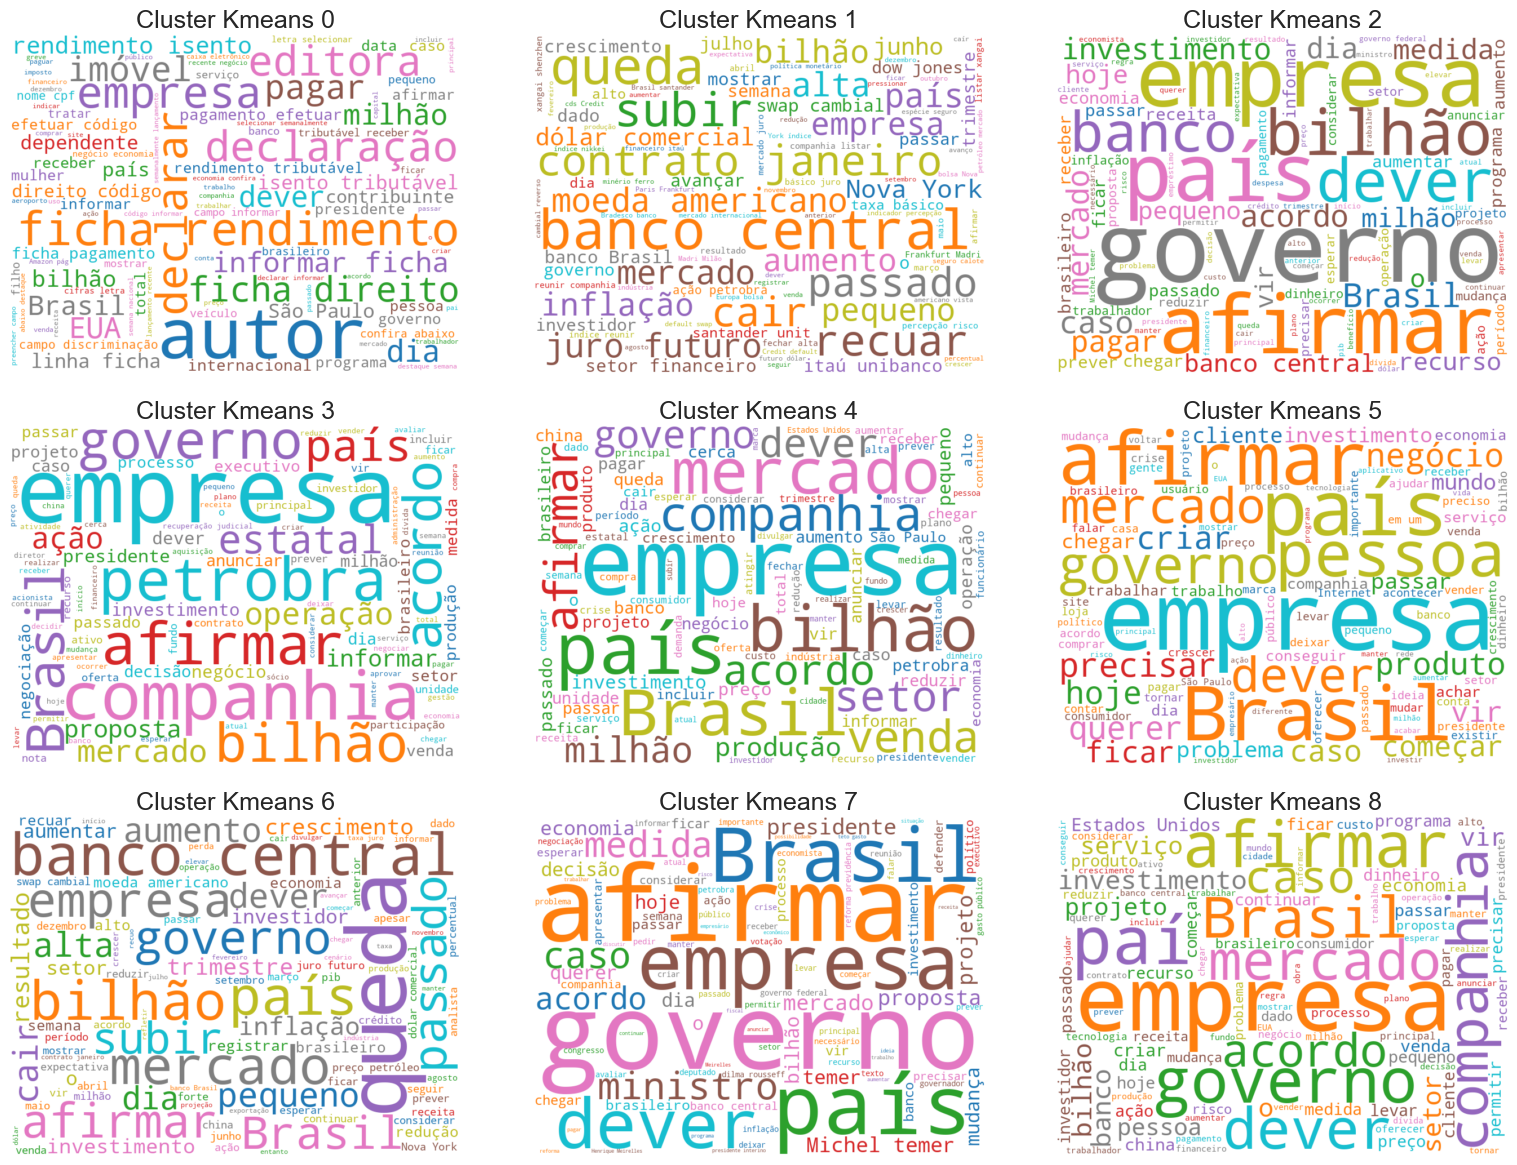

In [59]:
from wordcloud import WordCloud

fig, axes = plt.subplots(3, 3, figsize=(16,12))


for cluster_id in sorted(news_2016.cluster_kmeans.unique()):
    texts = []
    cluster_df = news_2016[news_2016.cluster_kmeans == cluster_id]
    for text in cluster_df.spacy_lemma.tolist():
        texts.extend(text)
    text = " ".join(texts)
    wordcloud = WordCloud(width=800, height=600,
                          background_color="white",
                          colormap="tab10", max_words=100).generate(text)
    ax = axes.flatten()[cluster_id]
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"Cluster Kmeans {cluster_id}")
    ax.axis("off")
fig.tight_layout()